In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from  sklearn import svm
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [2]:
data1=pd.read_csv('applicant.csv')

In [3]:
data2=pd.read_csv('loan.csv')

In [4]:
data1.head()

,applicant_id,Primary_applicant_age_in_years,Gender,Marital_status,Number_of_dependents,Housing,Years_at_current_residence,Employment_status,Has_been_employed_for_at_least,Has_been_employed_for_at_most,Telephone,Foreign_worker,Savings_account_balance,Balance_in_existing_bank_account_(lower_limit_of_bucket),Balance_in_existing_bank_account_(upper_limit_of_bucket)
0,1469590,67,male,single,1,own,4,skilled employee / official,7 years,NaN,Registered under the applicant's name,1,NaN,NaN,0
1,1203873,22,female,divorced/separated/married,1,own,2,skilled employee / official,1 year,4 years,NaN,1,Low,0,2 lac
2,1432761,49,male,single,2,own,3,unskilled - resident,4 years,7 years,NaN,1,Low,NaN,NaN
3,1207582,45,male,single,2,for free,4,skilled employee / official,4 years,7 years,NaN,1,Low,NaN,0
4,1674436,53,male,single,2,for free,4,skilled employee / official,1 year,4 years,NaN,1,Low,NaN,0


In [5]:
data2.tail()

,loan_application_id,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
995,d68fbba6-edad-11ea-80fe-30b2f9300e3d,1880194,12,FF&E,1736000,3,real estate,0,0,NaN,1,existing loans paid back duly till now,0
996,d68fbc28-edad-11ea-bc62-4240ac0824fa,1114064,30,used vehicle,3857000,4,building society savings agreement/life insurance,0,0,NaN,1,existing loans paid back duly till now,0
997,d68fbcaa-edad-11ea-aafc-2de1139e42cd,1758046,12,electronic equipment,804000,4,car or other,0,0,NaN,1,existing loans paid back duly till now,0
998,d68fbd2c-edad-11ea-b49e-2894666f2df6,1824545,45,electronic equipment,1845000,4,NaN,0,0,NaN,1,existing loans paid back duly till now,1
999,d68fbdae-edad-11ea-a2ea-1c661d77d225,1660770,45,used vehicle,4576000,3,car or other,0,0,NaN,1,critical/pending loans at other banks,0


In [6]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

### Working on string and NaN values of applicant csv

In [11]:
df=pd.DataFrame(data1)

In [13]:
df.rename(columns={'Balance_in_existing_bank_account_(lower_limit_of_bucket)' :'Balance_in_existing_bank_account_lower',
'Balance_in_existing_bank_account_(upper_limit_of_bucket)':'Balance_in_existing_bank_account_upper'},inplace=True)

In [15]:
Has_been_employed_for_at_least=enc.fit_transform(data1['Has_been_employed_for_at_least'])
Has_been_employed_for_at_most=enc.fit_transform(data1['Has_been_employed_for_at_most'])
Savings_account_balance=enc.fit_transform(data1['Savings_account_balance'])
#Has_been_employed_for_at_least=enc.data_transform(data1['Has_been_employed_for_at_least'])
Balance_in_existing_bank_account_lower=enc.fit_transform(data1['Balance_in_existing_bank_account_lower'])
Balance_in_existing_bank_account_upper=enc.fit_transform(data1['Balance_in_existing_bank_account_upper'])
Telephone=enc.fit_transform(data1['Telephone'])

In [18]:
data1['Has_been_employed_for_at_least']=Has_been_employed_for_at_least
data1['Has_been_employed_for_at_most']=Has_been_employed_for_at_most
data1['Savings_account_balance']=Savings_account_balance
data1['Has_been_employed_for_at_least']=Has_been_employed_for_at_least
data1['Balance_in_existing_bank_account_(lower_limit_of_bucket)']=Balance_in_existing_bank_account_lower
data1['Balance_in_existing_bank_account_(upper_limit_of_bucket)']=Balance_in_existing_bank_account_upper
data1['Telephone']=Telephone

In [20]:
data1['Has_been_employed_for_at_least'].fillna(data1['Has_been_employed_for_at_least'].value_counts().idxmax(), inplace=True)
data1['Has_been_employed_for_at_most'].fillna(data1['Has_been_employed_for_at_most'].value_counts().idxmax(), inplace=True)
data1['Savings_account_balance'].fillna(data1['Savings_account_balance'].value_counts().idxmax(), inplace=True)
data1['Has_been_employed_for_at_least'].fillna(data1['Has_been_employed_for_at_least'].value_counts().idxmax(), inplace=True)
data1['Balance_in_existing_bank_account_lower'].fillna(data1['Balance_in_existing_bank_account_lower'].value_counts().idxmax(), inplace=True)
data1['Balance_in_existing_bank_account_upper'].fillna(data1['Balance_in_existing_bank_account_upper'].value_counts().idxmax(), inplace=True)
data1['Telephone'].fillna(data1['Telephone'].value_counts().idxmax(), inplace=True)

In [21]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                                                    Non-Null Count  Dtype 
---  ------                                                    --------------  ----- 
 0   applicant_id                                              1000 non-null   int64 
 1   Primary_applicant_age_in_years                            1000 non-null   int64 
 2   Gender                                                    1000 non-null   object
 3   Marital_status                                            1000 non-null   object
 4   Number_of_dependents                                      1000 non-null   int64 
 5   Housing                                                   1000 non-null   object
 6   Years_at_current_residence                                1000 non-null   int64 
 7   Employment_status                                         1000 non-null   object
 8   Has_been_employed_for_at_leas

### All NaN values have been updated in applicant's csv.

In [22]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                                       Non-Null Count  Dtype 
---  ------                                       --------------  ----- 
 0   loan_application_id                          1000 non-null   object
 1   applicant_id                                 1000 non-null   int64 
 2   Months_loan_taken_for                        1000 non-null   int64 
 3   Purpose                                      988 non-null    object
 4   Principal_loan_amount                        1000 non-null   int64 
 5   EMI_rate_in_percentage_of_disposable_income  1000 non-null   int64 
 6   Property                                     846 non-null    object
 7   Has_coapplicant                              1000 non-null   int64 
 8   Has_guarantor                                1000 non-null   int64 
 9   Other_EMI_plans                              186 non-null    object
 10  Number_of_exi

### We would change the missing values over here with the most common answer wherever there are less than 200 NaN values.

In [23]:
data2['Purpose'].fillna(data2['Purpose'].value_counts().idxmax(), inplace=True)
data2['Property'].fillna(data2['Property'].value_counts().idxmax(), inplace=True)

In [24]:
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

In [25]:
Purpose=enc.fit_transform(data2['Purpose'])
Property=enc.fit_transform(data2['Property'])

In [26]:
Other_EMI_plans=enc.fit_transform(data2['Other_EMI_plans'])

In [27]:
data2['Other_EMI_plans']=data2['Other_EMI_plans'].fillna(0)

In [28]:
Loan_history=enc.fit_transform(data2['Loan_history'])

### Values updated in loan csv.

In [29]:
data2['Purpose']=Purpose
data2['Property']=Property
data2['Other_EMI_plans']=Other_EMI_plans
data2['Loan_history']=Loan_history

In [30]:
newdf=data2.copy()
newdf = data2.drop("applicant_id", axis='columns')
newdf.head()

,loan_application_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,d68d975e-edad-11ea-8761-1d6f9c1ff461,6,5,1169000,4,2,0,0,2,2,1,0
1,d68d989e-edad-11ea-b1d5-2bcf65006448,48,5,5951000,2,2,0,0,2,1,3,1
2,d68d995c-edad-11ea-814a-1b6716782575,12,4,2096000,2,2,0,0,2,1,1,0
3,d68d99fc-edad-11ea-8841-17e8848060ae,42,0,7882000,2,0,0,1,2,1,3,0
4,d68d9a92-edad-11ea-9f3d-1f8682db006a,24,6,4870000,3,1,0,0,2,2,2,1


In [31]:
newdf = data2.drop("loan_application_id", axis='columns')
newdf.head()

,applicant_id,Months_loan_taken_for,Purpose,Principal_loan_amount,EMI_rate_in_percentage_of_disposable_income,Property,Has_coapplicant,Has_guarantor,Other_EMI_plans,Number_of_existing_loans_at_this_bank,Loan_history,high_risk_applicant
0,1469590,6,5,1169000,4,2,0,0,2,2,1,0
1,1203873,48,5,5951000,2,2,0,0,2,1,3,1
2,1432761,12,4,2096000,2,2,0,0,2,1,1,0
3,1207582,42,0,7882000,2,0,0,1,2,1,3,0
4,1674436,24,6,4870000,3,1,0,0,2,2,2,1


In [32]:
x = newdf.iloc[:,1:11]
y = newdf.iloc[:,11]

#make variabel for save the result and to show it
classifier = ('Gradient Boosting','Random Forest','Decision Tree','K-Nearest Neighbor','SVM')
y_pos = np.arange(len(classifier))
score = []

In [33]:
clf = GradientBoostingClassifier()
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 70.30%


In [34]:
clf = RandomForestClassifier(n_estimators=10)
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 68.10%


In [35]:
clf = DecisionTreeClassifier()
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 63.30%


In [36]:
clf = KNeighborsClassifier()
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

The accuration of classification is 64.30%


In [37]:
clf  =  svm.LinearSVC(max_iter=5000)
scores = cross_val_score(clf, x, y,cv=5)
score.append(scores.mean())
print('The accuration of classification is %.2f%%' %(scores.mean()*100))

C:\Users\asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


The accuration of classification is 54.00%


C:\Users\asus\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


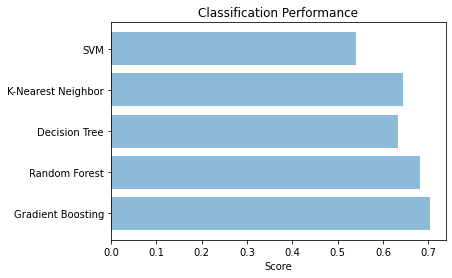

In [38]:
plt.barh(y_pos, score, align='center', alpha=0.5)
plt.yticks(y_pos, classifier)
plt.xlabel('Score')
plt.title('Classification Performance')
plt.show()

### So, we can see that gradient boosting serves as the best algorithm for our data .